Hebrew or Greek? :Hebrew
א ב ג ד ה ו ז ח ט י כ ך ל מ ם נ ן ס ע פ ף צ ץ ק ר ש ת
Please enter a hebrew word to be analysed: יהוה צבאות
1188.176923076923  Frequency in the OT as a whole


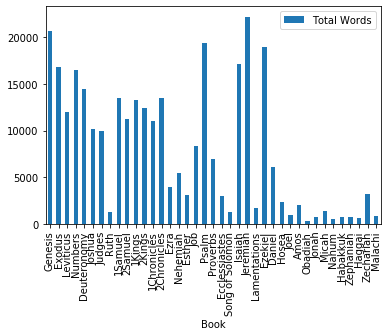

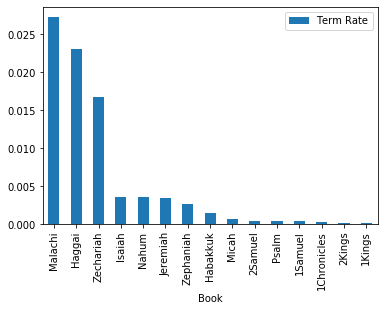

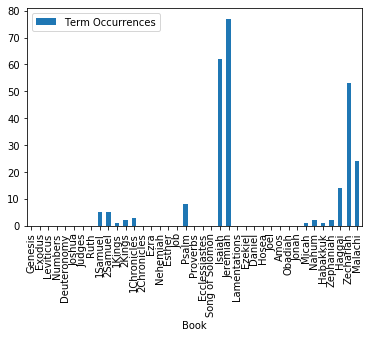

           Book  Term Occurrences  Total Words  Term Rate  Term Frequency
38      Malachi                24          880   0.027273       36.666667
36       Haggai                14          606   0.023102       43.285714
37    Zechariah                53         3157   0.016788       59.566038
22       Isaiah                62        17131   0.003619      276.306452
33        Nahum                 2          562   0.003559      281.000000
23     Jeremiah                77        22227   0.003464      288.662338
35    Zephaniah                 2          771   0.002594      385.500000
34     Habakkuk                 1          678   0.001475      678.000000
32        Micah                 1         1409   0.000710     1409.000000
9       2Samuel                 5        11253   0.000444     2250.600000
18        Psalm                 8        19422   0.000412     2427.750000
8       1Samuel                 5        13476   0.000371     2695.200000
12  1Chronicles                 3     

In [11]:
import pandas as pd
import codecs
import re
%matplotlib inline
import matplotlib.pyplot as plt
import collections
# Clone the entire repo.
#!git clone -l -s git://github.com/data-john/hebrew-analysis cloned-repo
#%cd cloned-repo
#!ls
def CleanHebrew(l):
    wrong = ['ויחננו\u202a','הירצך\u202a']
    right = ['ויחננו','הירצך']
    for i in range(len(wrong)):
        if wrong[i] in l:
            ind = l.index(wrong[i])
            l[ind] = right[i]
    return l
def CleanGreek(string):
    z = {'Α':'α',
     'Β':'β',
     'Γ':'γ',
     'Δ':'δ',
     'Ε':'ε',
     'Ζ':'ζ',
     'Η':'η',
     'Θ':'θ',
     'Ι':'ι',
     'Κ':'κ',
     'Λ':'λ',
     'Μ':'μ',
     'Ν':'ν',
     'Ξ':'ξ',
     'Ο':'ο',
     'Π':'π',
     'Ρ':'ρ',
     'Σ':'σ',
     'ς':'ς',
     'Τ':'τ',
     'Υ':'υ',
     'Φ':'φ',
     'Χ':'χ',
     'Ψ':'ψ',
     'Ω':'ω',
     'ά':'α',
     'ὰ':'α',
     'ᾲ':'α',
     'ά':'α',
     'ᾴ':'α',
     'ἀ':'α',
     'ᾀ':'α',
     'ἂ':'α',
     'ᾂ':'α',
     'ἄ':'α',
     'ᾄ':'α',
     'ἆ':'α',
     'ᾆ':'α',
     'Ὰ':'α',
     'Ά':'α',
     'Ἀ':'α',
     'ᾈ':'α',
     'Ἂ':'α',
     'ᾊ':'α',
     'Ἄ':'α',
     'ᾌ':'α',
     'Ἆ':'α',
     'ᾎ':'α',
     'ᾳ':'α',
     'ᾶ':'α',
     'ᾷ':'α',
     'ἁ':'α',
     'ᾁ':'α',
     'ἃ':'α',
     'ᾃ':'α',
     'ἅ':'α',
     'ᾅ':'α',
     'ἇ':'α',
     'ᾇ':'α',
     'ᾼ':'α',
     'Ἁ':'α',
     'ᾉ':'α',
     'Ἃ':'α',
     'ᾋ':'α',
     'Ἅ':'α',
     'ᾍ':'α',
     'Ἇ':'α',
     'Ᾰ':'α',
     'Ᾱ':'α',
     'ᾰ':'α',
     'ᾱ':'α',
     'Β':'β',
     'Γ':'γ',
     'Δ':'δ',
     'Ε':'ε',
     'ὲ':'ε',
     'έ':'ε',
     'ἐ':'ε',
     'ἒ':'ε',
     'ἔ':'ε',
     'Ὲ':'ε',
     'Έ':'ε',
     'Ἐ':'ε',
     'Ἒ':'ε',
     'Ἔ':'ε',
     'ἑ':'ε',
     'ἓ':'ε',
     'ἕ':'ε',
     'Ἑ':'ε',
     'Ἓ':'ε',
     'Ἕ':'ε',
     'έ':'ε',
     'Ζ':'ζ',
     'Η':'η',
     'ὴ':'η',
     'ῂ':'η',
     'ή':'η',
     'ῄ':'η',
     'ἠ':'η',
     'ᾐ':'η',
     'ἢ':'η',
     'ᾒ':'η',
     'ἤ':'η',
     'ᾔ':'η',
     'ἦ':'η',
     'ᾖ':'η',
     'Ὴ':'η',
     'Ή':'η',
     'Ἠ':'η',
     'ᾘ':'η',
     'Ἢ':'η',
     'ᾚ':'η',
     'Ἤ':'η',
     'ᾜ':'η',
     'Ἦ':'η',
     'ᾞ':'η',
     'ῃ':'η',
     'ῆ':'η',
     'ῇ':'η',
     'ἡ':'η',
     'ᾑ':'η',
     'ἣ':'η',
     'ᾓ':'η',
     'ἥ':'η',
     'ᾕ':'η',
     'ἧ':'η',
     'ᾗ':'η',
     'Ἧ':'η',
     'ῌ':'η',
     'Ἡ':'η',
     'ᾙ':'η',
     'Ἣ':'η',
     'ᾛ':'η',
     'Ἥ':'η',
     'ᾝ':'η',
     'ή':'η',
     'Θ':'θ',
     'Ι':'ι',
     'ὶ':'ι',
     'ί':'ι',
     'ἰ':'ι',
     'ἲ':'ι',
     'ἴ':'ι',
     'ἶ':'ι',
     'Ὶ':'ι',
     'Ί':'ι',
     'Ἰ':'ι',
     'Ἲ':'ι',
     'Ἴ':'ι',
     'Ἶ':'ι',
     'ῖ':'ι',
     'ἱ':'ι',
     'ἳ':'ι',
     'ἵ':'ι',
     'ἷ':'ι',
     'Ἱ':'ι',
     'Ἳ':'ι',
     'Ἵ':'ι',
     'Ῐ':'ι',
     'Ῑ':'ι',
     'ῑ':'ι',
     'ῐ':'ι',
     'ῒ':'ι',
     'ΐ':'ι',
     'Ῑ':'ι',
     'ϊ':'ι',
     'ῗ':'ι',
     'Ϊ':'ι',
     'ί':'ι',
     'ΐ':'ι',
     'Κ':'κ',
     'Λ':'λ',
     'Μ':'μ',
     'Ν':'ν',
     'Ξ':'ξ',
     'Ο':'ο',
     'ὸ':'ο',
     'ό':'ο',
     'ὀ':'ο',
     'ὂ':'ο',
     'ὄ':'ο',
     'Ὸ':'ο',
     'Ό':'ο',
     'Ὀ':'ο',
     'Ὂ':'ο',
     'Ὄ':'ο',
     'ὁ':'ο',
     'ὃ':'ο',
     'ὅ':'ο',
     'Ὁ':'ο',
     'Ὃ':'ο',
     'Ὅ':'ο',
     'ό':'ο',
     'Π':'π',
     'Ρ':'ρ',
     'ῤ':'ρ',
     'ῥ':'ρ',
     'Ῥ':'ρ',
     'Σ':'σ',
     'ς':'ς',
     'Τ':'τ',
     'Υ':'υ',
     'ὺ':'υ',
     'ύ':'υ',
     'ὐ':'υ',
     'ὒ':'υ',
     'ὔ':'υ',
     'ὖ':'υ',
     'ύ':'υ',
     'Ύ':'υ',
     'Ὺ':'υ',
     'ῦ':'υ',
     'ὑ':'υ',
     'ὓ':'υ',
     'ὕ':'υ',
     'ὗ':'υ',
     'Ὗ':'υ',
     'Ῠ':'υ',
     'Ὓ':'υ',
     'Ὕ':'υ',
     'ῢ':'υ',
     'ΰ':'υ',
     'Ῡ':'υ',
     'ϋ':'υ',
     'ῧ':'υ',
     'Ϋ':'υ',
     'Ὑ':'υ',
     'ΰ':'υ',
     'Φ':'φ',
     'Χ':'χ',
     'Ψ':'ψ',
     'Ω':'ω',
     'ὼ':'ω',
     'ώ':'ω',
     'ὠ':'ω',
     'ὢ':'ω',
     'ὤ':'ω',
     'ὦ':'ω',
     'ῲ':'ω',
     'ῴ':'ω',
     'ᾠ':'ω',
     'ᾢ':'ω',
     'ᾤ':'ω',
     'ᾦ':'ω',
     'Ὼ':'ω',
     'Ώ':'ω',
     'Ὠ':'ω',
     'ᾪ':'ω',
     'ᾨ':'ω',
     'Ὢ':'ω',
     'Ὤ':'ω',
     'Ὦ':'ω',
     'ᾬ':'ω',
     'ᾮ':'ω',
     'ῳ':'ω',
     'ῷ':'ω',
     'ῶ':'ω',
     'ὡ':'ω',
     'ᾡ':'ω',
     'ὣ':'ω',
     'ᾣ':'ω',
     'ὥ':'ω',
     'ᾥ':'ω',
     'ᾧ':'ω',
     'ὧ':'ω',
     'ῼ':'ω',
     'ᾩ':'ω',
     'Ὡ':'ω',
     'Ὣ':'ω',
     'ᾫ':'ω',
     'Ὥ':'ω',
     'ᾭ':'ω',
     'ώ':'ω',
     'Ὧ':'ω',
        }
    GrkString = string
    grk = ['α','β','γ','δ','ε','ζ','η','θ','ι','κ','λ','μ','ν','ξ','ο','π','ρ','σ','ς','τ','υ','φ','χ','ψ','ω']
    punc = [',','.'," ",'	',':','’','\'','·','⸂','⸃','⸀','\n','\r',';','⸁','—','᾽',';','(', ')', '⸄', '⸅', '⟦', '⟧',']', '[']
    eng = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','0','1','2','3','4','5','6','7','8','9']
    output = []
    log = []
    for character in GrkString:
        if character in z:
            number = z.get(character)
            output.append(number)
        
        elif not(character in grk):
            output.append(" ")
    
        else:
            output.append(character)
        if not(character in grk) and not(character in punc) and not(character in eng) and not(character in z):
            log.append(character)
    NString = "".join(output)
    NewString = " ".join(NString.split())
    #print(len(GrkString),len(NewString),log)
    return NewString
def StringCount(key,tlist):
    txt = ' '.join(tlist)
    key1 = ' '.join(key.split())
    c = txt.count(key1)
    #print(txt)
    #print(key1)
    return c
    
def PhraseCount(string,tlist):
    Same = False
    c = 0
    l1 = string.split()
    len1 = len(l1)
    len2 = len(tlist)
    for x in range(len2):
        if tlist[x] == l1[0]:
            for i in range(len1-1):
                Same = False
                if tlist[x+i+1] == l1[i+1]:
                    Same = True
            if Same is True:
                print(x)
                c+=1
    return c    
def IsHebrew(string):
    '''
    Takes a string and returns whether it is Hebrew text as a Boolean value. If the string begins and ends with a hebrew character it is considered to be hebrew.
    '''
    HEBREW = False
    heb = ['א','ב','ג','ד','ה','ו','ז','ח','ט','י','כ','ך','ל','מ','ם','נ','ן','ס','ע','פ','ף','צ','ץ','ק','ר','ש','ת']
    s=0
    a=0
    for i in heb:
        if string.endswith(i):
            s+=1
        if string.startswith(i):
            s+=1
        a+=1
    if s == 1:
        print(string)
        print(len(string))
        print(len(string.strip()))
    if s > 1:
        HEBREW = True
    return HEBREW  
def IsGreek(string):
    '''
    Takes a string and returns whether it is Hebrew text as a Boolean value. If the string begins and ends with a hebrew character it is considered to be hebrew.
    '''
    GREEK = False
    grk = ['α','β','γ','δ','ε','ζ','η','θ','ι','κ','λ','μ','ν','ξ','ο','π','ρ','σ','ς','τ','υ','φ','χ','ψ','ω']
    s=0
    a=0
    for i in grk:
        if string.endswith(i):
            s+=1
        if string.startswith(i):
            s+=1
        a+=1
    if s == 1:
        print(string)
        print(len(string))
        print(len(string.strip()))
    if s > 1:
        GREEK = True
    return GREEK      
def TxtToHebList(txtfile):
    '''
    Takes a UTF-8 .txt file and compiles and returns a list of all hebrew words in the file
    '''
    mal = codecs.open(txtfile,'r','utf8')
    mal1 = mal.read()
    mal3 = len(mal1)
    #print(mal3)
    malx = mal1.replace(r"/"," ").replace("["," ").replace("]"," ").replace("*"," ").replace("\u202a"," ")
    maly = malx.split()
    mal4 = maly
    len1 = len(mal4)
    for n in mal4:
        n.strip()
    mal5= list([])
    i = -1
    for w in mal4:
        i += 1
    
        if IsHebrew(mal4[i]) == True:
            mal5.append(mal4[i])
            continue
        else:
            mal4.pop(i)
    return mal5
def TxtToGrkList(txtfile):
    '''
    Takes a UTF-8 .txt file and compiles and returns a list of all greek words in the file
    '''
    mal = codecs.open(txtfile,'r','utf8')
    mal1 = mal.read()
    mal3 = len(mal1)
    #print(mal3)
    mal2 = CleanGreek(mal1)
    malx = mal2.replace(r"/"," ").replace("["," ").replace("]"," ").replace("*"," ").replace("\u202a"," ")
    maly = malx.split()
    mal4 = maly
    len1 = len(mal4)
    for n in mal4:
        n.strip()
    mal5= list([])
    i = -1
    for w in mal4:
        i += 1
    
        if IsGreek(mal4[i]) == True:
            mal5.append(mal4[i])
            continue
        else:
            mal4.pop(i)
    return mal5
def OTAnalyse(hebstring):
    loc = '/content/drive/My Drive/data/'
    Filenames = ['Gen.txt','Exodus.txt','Lev.txt','Num.txt','Deut.txt','Josh.txt','Judg.txt','Ruth.txt','1Sam.txt','2Sam.txt','1Kings.txt','2Kings.txt','1Chr.txt','2Chr.txt','Ezra.txt','Neh.txt','Esth.txt','Job.txt','Ps.txt','Prov.txt','Eccl.txt','Song.txt','Isa.txt','Jer.txt','Lam.txt','Ezek.txt','Dan.txt','Hos.txt','Joel.txt','Am.txt','Ob.txt','Jon.txt','Mic.txt','Nah.txt','Hab.txt','Zeph.txt','Hag.txt','Zech.txt','Mal.txt']
    Bible = []
    for n in Filenames:
        x = TxtToHebList(n)
        Bible.append(x)
    WordCount = []    
    for x in range(39):
        WordCount.append(len(Bible[x]))
    #print(PhraseCount('יהוה צבאות',Bible[38]))
    #for n,l in enumerate(Bible[38]):
        #print(n,l)
    Books = ['Genesis','Exodus','Leviticus','Numbers','Deuteronomy','Joshua','Judges','Ruth','1Samuel','2Samuel','1Kings','2Kings','1Chronicles','2Chronicles','Ezra','Nehemiah','Esther','Job','Psalm','Proverbs','Ecclessiastes','Song of Solomon','Isaiah','Jeremiah','Lamentations','Ezekiel','Daniel','Hosea','Joel','Amos','Obadiah','Jonah','Micah','Nahum','Habakkuk','Zephaniah','Haggai','Zechariah','Malachi']
    TzCount = []
    TzRate = []
    TzFreq = []
    for x in range(39):
        TzCount.append(StringCount(hebstring,Bible[x]))
        try:
            TzRate.append((TzCount[x] / WordCount[x]))
        except ZeroDivisionError:
            TzRate.append(0)
        try:
            TzFreq.append(( WordCount[x] / TzCount[x]))
        except ZeroDivisionError:
            TzFreq.append(0)
    #for x in range(39):
        #print(Books[x],TzCount[x]," ",WordCount[x]," ",TzRate[x])
    
    OT = [('Book',Books),
         ('Term Occurrences',TzCount),
         ('Total Words',WordCount),
         ('Term Rate',TzRate),
         ('Term Frequency',TzFreq), 
         ]
    data = pd.DataFrame.from_dict(collections.OrderedDict(OT))
    df = data[(data !=0).all(1)].copy()
    df1 = df.sort_values(by = 'Term Rate', ascending = False).copy()
    TotalTzRate = sum(WordCount)/sum(TzCount)
    print(TotalTzRate, ' Frequency in the OT as a whole')
    return [data, df1]
def NTAnalyse(hebstring):
    loc = '/content/drive/My Drive/data/'
    Filenames = ['61-Mt.txt','62-Mk.txt','63-Lk.txt','64-Jn.txt','65-Ac.txt','66-Ro.txt','67-1Co.txt','68-2Co.txt','69-Ga.txt','70-Eph.txt','71-Php.txt','72-Col.txt','73-1Th.txt','74-2Th.txt','75-1Ti.txt','76-2Ti.txt','77-Tit.txt','78-Phm.txt','79-Heb.txt','80-Jas.txt','81-1Pe.txt','82-2Pe.txt','83-1Jn.txt','84-2Jn.txt','85-3Jn.txt','86-Jud.txt','87-Re.txt']
    Bible = []
    for n in Filenames:
        x = TxtToGrkList(n)
        Bible.append(x)
    WordCount = []    
    for x in range(27):
        WordCount.append(len(Bible[x]))
    #print(PhraseCount('יהוה צבאות',Bible[26]))
    #for n,l in enumerate(Bible[26]):
        #print(n,l)
    Books = ['Matthew','Mark','Luke','John','Acts','Romans','1Corinthians','2Corinthians','Galatians','Ephesians','Philipians','Colossians','1Thessolonians','2Thessolonians','1Timothy','2Timothy','Titus','Philemon','Hebrews','James','1Peter','2Peter','1John','2John','3John','Jude','Revelation']
    TzCount = []
    TzRate = []
    TzFreq = []
    for x in range(27):
        TzCount.append(StringCount(hebstring,Bible[x]))
        try:
            TzRate.append((TzCount[x] / WordCount[x]))
        except ZeroDivisionError:
            TzRate.append(0)
        try:
            TzFreq.append(( WordCount[x] / TzCount[x]))
        except ZeroDivisionError:
            TzFreq.append(0)
    #for x in range(39):
        #print(Books[x],TzCount[x]," ",WordCount[x]," ",TzRate[x])
    
    OT = [('Book',Books),
         ('Term Occurrences',TzCount),
         ('Total Words',WordCount),
         ('Term Rate',TzRate),
         ('Term Frequency',TzFreq), 
         ]
    data = pd.DataFrame.from_dict(collections.OrderedDict(OT))
    df = data[(data !=0).all(1)].copy()
    df1 = df.sort_values(by = 'Term Rate', ascending = False).copy()
    TotalTzRate = sum(WordCount)/sum(TzCount)
    print(TotalTzRate, ' Frequency in the NT as a whole')
    return [data, df1]
def OTProgram():
    heb = 'א ב ג ד ה ו ז ח ט י כ ך ל מ ם נ ן ס ע פ ף צ ץ ק ר ש ת'
    print(heb)
    inputstring = input('Please enter a hebrew word to be analysed: ')
    datalist = OTAnalyse(inputstring)
    data = datalist[0]
    df = datalist[1]
    data.plot(kind='bar',x='Book',y='Total Words')
    plt.show()
    df.plot(kind='bar',x='Book',y='Term Rate')
    plt.show()
    df.head()
    data.plot(kind='bar',x='Book',y='Term Occurrences')
    plt.show()
    print(df)
def NTProgram():
    grk = 'α β γ δ ε ζ η θ ι κ λ μ ν ξ ο π ρ σ ς τ υ φ χ ψ ω'
    print(grk)
    inputstring = input('Please enter a greek word to be analysed: ')
    datalist = NTAnalyse(CleanGreek(inputstring))
    data = datalist[0]
    df = datalist[1]
    data.plot(kind='bar',x='Book',y='Total Words')
    plt.show()
    df.plot(kind='bar',x='Book',y='Term Rate')
    plt.show()
    df.head()
    data.plot(kind='bar',x='Book',y='Term Occurrences')
    plt.show()
    print(df)
choice = input('Hebrew or Greek? :').lower()
if choice == "hebrew" or choice == "heb" or choice == "h":
    OTProgram()
else:
    NTProgram()

In [11]:
import string
mal = codecs.open('61-Mt.txt','r','utf8')
mal1 = mal.read()
grk = ''.join(set(mal1))
print(grk)


ανἀγἠὄἴ⸀ἃλΜἑὙἜ⸂⸁9ηἌἓΧΟυεώΕᾠὥῢἂἪὭύἭὋἹἬῷΦῶᾅὅ	Σὖῥώή
ΤἨὍπὁ8ὺὐΙἶ;ξΑί.ιΔὩὕῇᾔὼάῬΛῦᾧὀῒὴᾶ:ᾗ⸃tἤΓμἩ5ᾳἱϋἆὝὃ ῆοὈᾖ1ῖἉὦωἔἰθέΚἘἈἐΖ34ΠϊὸΐὧὉΰ’ύὗ;ὲἅἣρ0ὰζἧ,ἦτᾐψΒχἸῃἷὡἝςφ


In [1]:

z = {'Α':'α',
     'Β':'β',
     'Γ':'γ',
     'Δ':'δ',
     'Ε':'ε',
     'Ζ':'ζ',
     'Η':'η',
     'Θ':'θ',
     'Ι':'ι',
     'Κ':'κ',
     'Λ':'λ',
     'Μ':'μ',
     'Ν':'ν',
     'Ξ':'ξ',
     'Ο':'ο',
     'Π':'π',
     'Ρ':'ρ',
     'Σ':'σ',
     'ς':'ς',
     'Τ':'τ',
     'Υ':'υ',
     'Φ':'φ',
     'Χ':'χ',
     'Ψ':'ψ',
     'Ω':'ω',
     'ά':'α',
     'ὰ':'α',
     'ᾲ':'α',
     'ά':'α',
     'ᾴ':'α',
     'ἀ':'α',
     'ᾀ':'α',
     'ἂ':'α',
     'ᾂ':'α',
     'ἄ':'α',
     'ᾄ':'α',
     'ἆ':'α',
     'ᾆ':'α',
     'Ὰ':'α',
     'Ά':'α',
     'Ἀ':'α',
     'ᾈ':'α',
     'Ἂ':'α',
     'ᾊ':'α',
     'Ἄ':'α',
     'ᾌ':'α',
     'Ἆ':'α',
     'ᾎ':'α',
     'ᾳ':'α',
     'ᾶ':'α',
     'ᾷ':'α',
     'ἁ':'α',
     'ᾁ':'α',
     'ἃ':'α',
     'ᾃ':'α',
     'ἅ':'α',
     'ᾅ':'α',
     'ἇ':'α',
     'ᾇ':'α',
     'ᾼ':'α',
     'Ἁ':'α',
     'ᾉ':'α',
     'Ἃ':'α',
     'ᾋ':'α',
     'Ἅ':'α',
     'ᾍ':'α',
     'Ἇ':'α',
     'Ᾰ':'α',
     'Ᾱ':'α',
     'ᾰ':'α',
     'ᾱ':'α',
     'Β':'β',
     'Γ':'γ',
     'Δ':'δ',
     'Ε':'ε',
     'ὲ':'ε',
     'έ':'ε',
     'ἐ':'ε',
     'ἒ':'ε',
     'ἔ':'ε',
     'Ὲ':'ε',
     'Έ':'ε',
     'Ἐ':'ε',
     'Ἒ':'ε',
     'Ἔ':'ε',
     'ἑ':'ε',
     'ἓ':'ε',
     'ἕ':'ε',
     'Ἑ':'ε',
     'Ἓ':'ε',
     'Ἕ':'ε',
     'έ':'ε',
     'Ζ':'ζ',
     'Η':'η',
     'ὴ':'η',
     'ῂ':'η',
     'ή':'η',
     'ῄ':'η',
     'ἠ':'η',
     'ᾐ':'η',
     'ἢ':'η',
     'ᾒ':'η',
     'ἤ':'η',
     'ᾔ':'η',
     'ἦ':'η',
     'ᾖ':'η',
     'Ὴ':'η',
     'Ή':'η',
     'Ἠ':'η',
     'ᾘ':'η',
     'Ἢ':'η',
     'ᾚ':'η',
     'Ἤ':'η',
     'ᾜ':'η',
     'Ἦ':'η',
     'ᾞ':'η',
     'ῃ':'η',
     'ῆ':'η',
     'ῇ':'η',
     'ἡ':'η',
     'ᾑ':'η',
     'ἣ':'η',
     'ᾓ':'η',
     'ἥ':'η',
     'ᾕ':'η',
     'ἧ':'η',
     'ᾗ':'η',
     'Ἧ':'η',
     'ῌ':'η',
     'Ἡ':'η',
     'ᾙ':'η',
     'Ἣ':'η',
     'ᾛ':'η',
     'Ἥ':'η',
     'ᾝ':'η',
     'ή':'η',
     'Θ':'θ',
     'Ι':'ι',
     'ὶ':'ι',
     'ί':'ι',
     'ἰ':'ι',
     'ἲ':'ι',
     'ἴ':'ι',
     'ἶ':'ι',
     'Ὶ':'ι',
     'Ί':'ι',
     'Ἰ':'ι',
     'Ἲ':'ι',
     'Ἴ':'ι',
     'Ἶ':'ι',
     'ῖ':'ι',
     'ἱ':'ι',
     'ἳ':'ι',
     'ἵ':'ι',
     'ἷ':'ι',
     'Ἱ':'ι',
     'Ἳ':'ι',
     'Ἵ':'ι',
     'Ῐ':'ι',
     'Ῑ':'ι',
     'ῑ':'ι',
     'ῐ':'ι',
     'ῒ':'ι',
     'ΐ':'ι',
     'Ῑ':'ι',
     'ϊ':'ι',
     'ῗ':'ι',
     'Ϊ':'ι',
     'ί':'ι',
     'ΐ':'ι',
     'Κ':'κ',
     'Λ':'λ',
     'Μ':'μ',
     'Ν':'ν',
     'Ξ':'ξ',
     'Ο':'ο',
     'ὸ':'ο',
     'ό':'ο',
     'ὀ':'ο',
     'ὂ':'ο',
     'ὄ':'ο',
     'Ὸ':'ο',
     'Ό':'ο',
     'Ὀ':'ο',
     'Ὂ':'ο',
     'Ὄ':'ο',
     'ὁ':'ο',
     'ὃ':'ο',
     'ὅ':'ο',
     'Ὁ':'ο',
     'Ὃ':'ο',
     'Ὅ':'ο',
     'ό':'ο',
     'Π':'π',
     'Ρ':'ρ',
     'ῤ':'ρ',
     'ῥ':'ρ',
     'Ῥ':'ρ',
     'Σ':'σ',
     'ς':'ς',
     'Τ':'τ',
     'Υ':'υ',
     'ὺ':'υ',
     'ύ':'υ',
     'ὐ':'υ',
     'ὒ':'υ',
     'ὔ':'υ',
     'ὖ':'υ',
     'ύ':'υ',
     'Ύ':'υ',
     'Ὺ':'υ',
     'ῦ':'υ',
     'ὑ':'υ',
     'ὓ':'υ',
     'ὕ':'υ',
     'ὗ':'υ',
     'Ὗ':'υ',
     'Ῠ':'υ',
     'Ὓ':'υ',
     'Ὕ':'υ',
     'ῢ':'υ',
     'ΰ':'υ',
     'Ῡ':'υ',
     'ϋ':'υ',
     'ῧ':'υ',
     'Ϋ':'υ',
     'Ὑ':'υ',
     'ΰ':'υ',
     'Φ':'φ',
     'Χ':'χ',
     'Ψ':'ψ',
     'Ω':'ω',
     'ὼ':'ω',
     'ώ':'ω',
     'ὠ':'ω',
     'ὢ':'ω',
     'ὤ':'ω',
     'ὦ':'ω',
     'ῲ':'ω',
     'ῴ':'ω',
     'ᾠ':'ω',
     'ᾢ':'ω',
     'ᾤ':'ω',
     'ᾦ':'ω',
     'Ὼ':'ω',
     'Ώ':'ω',
     'Ὠ':'ω',
     'ᾪ':'ω',
     'ᾨ':'ω',
     'Ὢ':'ω',
     'Ὤ':'ω',
     'Ὦ':'ω',
     'ᾬ':'ω',
     'ᾮ':'ω',
     'ῳ':'ω',
     'ῷ':'ω',
     'ῶ':'ω',
     'ὡ':'ω',
     'ᾡ':'ω',
     'ὣ':'ω',
     'ᾣ':'ω',
     'ὥ':'ω',
     'ᾥ':'ω',
     'ᾧ':'ω',
     'ὧ':'ω',
     'ῼ':'ω',
     'ᾩ':'ω',
     'Ὡ':'ω',
     'Ὣ':'ω',
     'ᾫ':'ω',
     'Ὥ':'ω',
     'ᾭ':'ω',
     'ώ':'ω',
     'Ὧ':'ω',
    }
z
mal = codecs.open('87-Re.txt','r','utf8')
mal1 = mal.read()
GrkString = mal1 
grk = ['α','β','γ','δ','ε','ζ','η','θ','ι','κ','λ','μ','ν','ξ','ο','π','ρ','σ','ς','τ','υ','φ','χ','ψ','ω']
punc = [',','.'," ",'	',':','’','\'','·','⸂','⸃','⸀','\n','\r',';','⸁','—','᾽',';','(', ')', '⸄', '⸅', '⟦', '⟧']
eng = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','0','1','2','3','4','5','6','7','8','9']
output = []
log = []
for character in GrkString:
    if character in z:
        number = z.get(character)
        output.append(number)
        
    elif not(character in grk):
        output.append(" ")
    
    else:
        output.append(character)
    if not(character in grk) and not(character in punc) and not(character in eng) and not(character in z):
        log.append(character)
NString = "".join(output)
NewString = " ".join(NString.split())
print(len(GrkString),len(NewString),log)

NameError: name 'codecs' is not defined